# Importing libraries

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from google.colab import files

# Loading datasets

In [88]:
test = pd.read_csv('https://drive.google.com/uc?export=download&id=1Dg-7iQ_-ARelt3942X7axO0h8tamFWfl')
train = pd.read_csv('https://drive.google.com/uc?export=download&id=1ztR0XJN0r3fCXXu1ZpndRkBqfT_jizWg')

# Exploratory Data Analysis (EDA)

In [89]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [90]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [91]:
# Missing values check
train_isna = train.isna().sum() > 0
train.loc[:, train_isna].isna().sum().sort_values(ascending=False) / len(train) * 100

,0
Cabin,77.104377
Age,19.865320
Embarked,0.224467


In [92]:
# Making sure that PassengerId contains unique values
train['PassengerId'].unique().size == len(train)

True

In [93]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [94]:
# Define colors for charts
colors = ['#99AFF2', '#a3bf78']

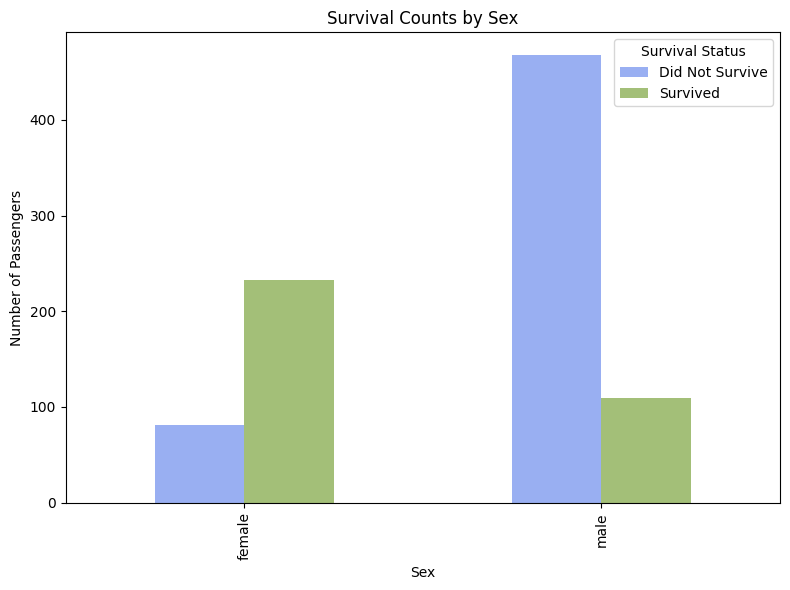

In [95]:
# Calculating survival counts by sex
survival_sex = train.groupby('Sex')['Survived'].value_counts().unstack()

# Plotting
survival_sex.plot(kind='bar', figsize=(8,6), color=colors)
plt.title('Survival Counts by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')
plt.legend(['Did Not Survive', 'Survived'], title='Survival Status')
plt.tight_layout()
plt.show()

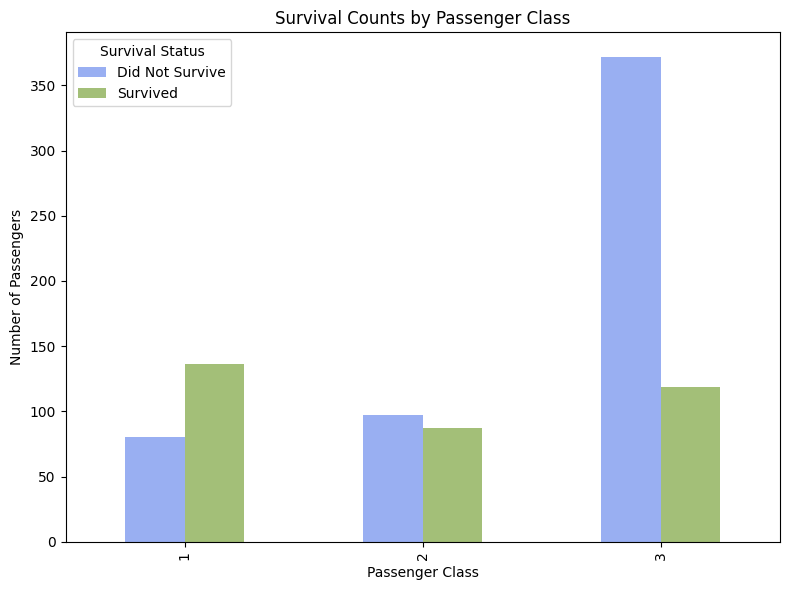

In [96]:
# Calculating survival counts by Pclass
survival_pclass = train.groupby('Pclass')['Survived'].value_counts().unstack()

# Plotting
survival_pclass.plot(kind='bar', figsize=(8,6), color=colors)
plt.title('Survival Counts by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.legend(['Did Not Survive', 'Survived'], title='Survival Status')
plt.tight_layout()
plt.show()

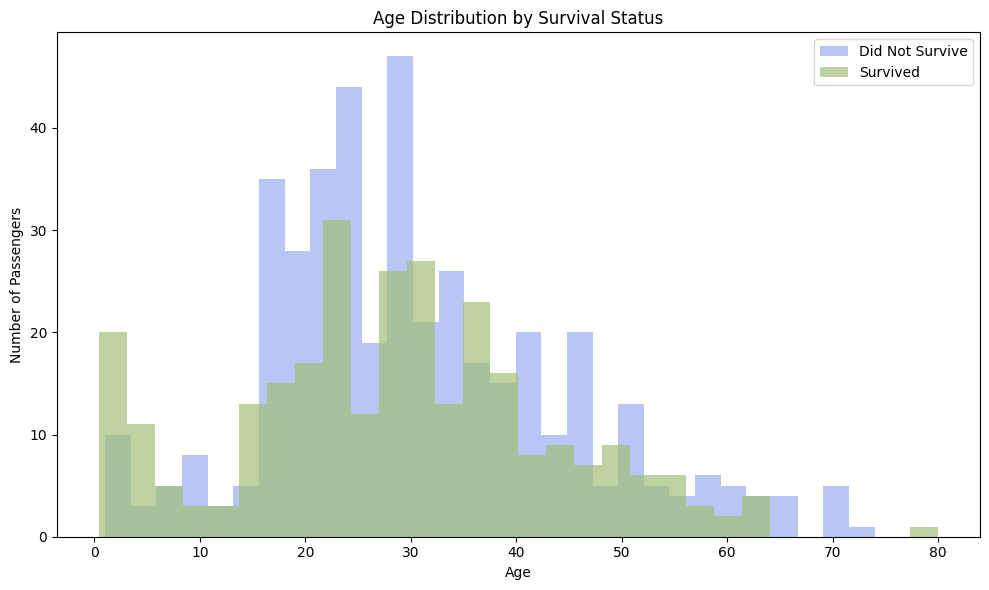

In [97]:
# Dropping rows with missing Age values
age_data = train.dropna(subset=['Age'])

# Plotting
plt.figure(figsize=(10,6))
plt.hist(age_data[age_data['Survived'] == 0]['Age'], bins=30, alpha=0.7, label='Did Not Survive', color=colors[0])
plt.hist(age_data[age_data['Survived'] == 1]['Age'], bins=30, alpha=0.7, label='Survived', color=colors[1])
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend()
plt.tight_layout()
plt.show()

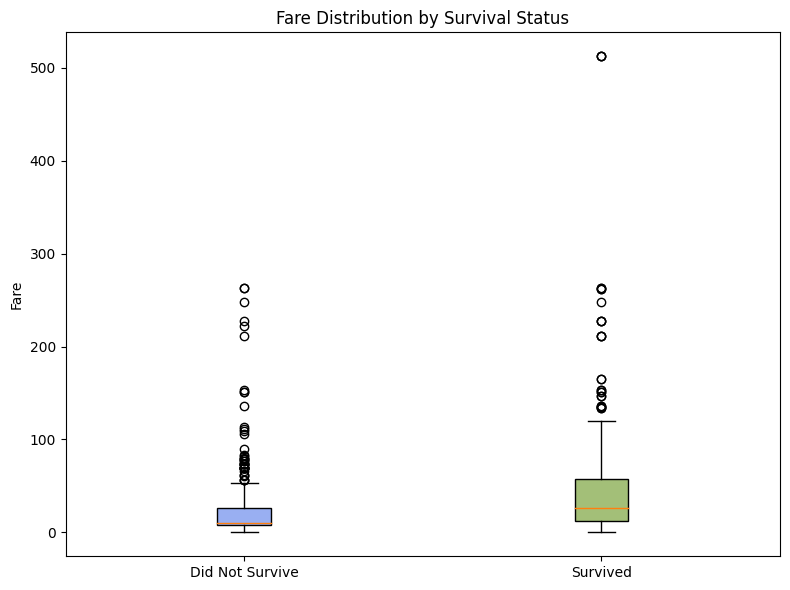

In [123]:
# Create a figure
plt.figure(figsize=(8,6))

# Create boxplot
box = plt.boxplot([
    train[train['Survived'] == 0]['Fare'],
    train[train['Survived'] == 1]['Fare']
], labels=['Did Not Survive', 'Survived'], patch_artist=True)

# Customize box colors
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Customize other elements (optional)
plt.title('Fare Distribution by Survival Status')
plt.ylabel('Fare')
plt.tight_layout()
plt.show()

# Data preprocessing

Missing values

In [98]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [99]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)

<ipython-input-99-faee2dd1680a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)


To fill missing values in Sex column I am using Title column.

In [100]:
train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [101]:
# Cleaning Title column
train['Title'] = train['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other') # I am replacins unpopular titles with 'other'.
train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


In [102]:
# Grouping cleaned title by mean age will help me fillna in age column
train.groupby(['Title'])['Age'].mean()

,Age
Title,
Master,4.574167
Miss,21.845638
Mr,32.368090
Mrs,35.788991
Other,45.545455


In [103]:
# Calculating the mean age per title
age_mean = train.groupby('Title')['Age'].mean()

# Filling NaN values in age column
train['Age'] = train.apply(lambda row: age_mean[row['Title']] if pd.isna(row['Age']) else row['Age'], axis=1)

In [104]:
# Mapping title column
title_mapping = {"Master": 1, "Miss": 2, "Mr": 3, "Mrs": 4, "Other": 5}
train['Title'] = train['Title'].map(title_mapping)

In [105]:
# Defining numeric and categorical features
train_clean = train.drop(columns=['Cabin','Name','Ticket'], axis=1)
train_clean['Sex'] = train_clean['Sex'].map({'male': True, 'female': False}).astype('boolean')
train_clean['Embarked'] = train_clean['Embarked'].astype('category')
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    boolean 
 4   Age          891 non-null    float64 
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Fare         891 non-null    float64 
 8   Embarked     891 non-null    category
 9   Title        891 non-null    int64   
dtypes: boolean(1), category(1), float64(2), int64(6)
memory usage: 58.6 KB


<Axes: >

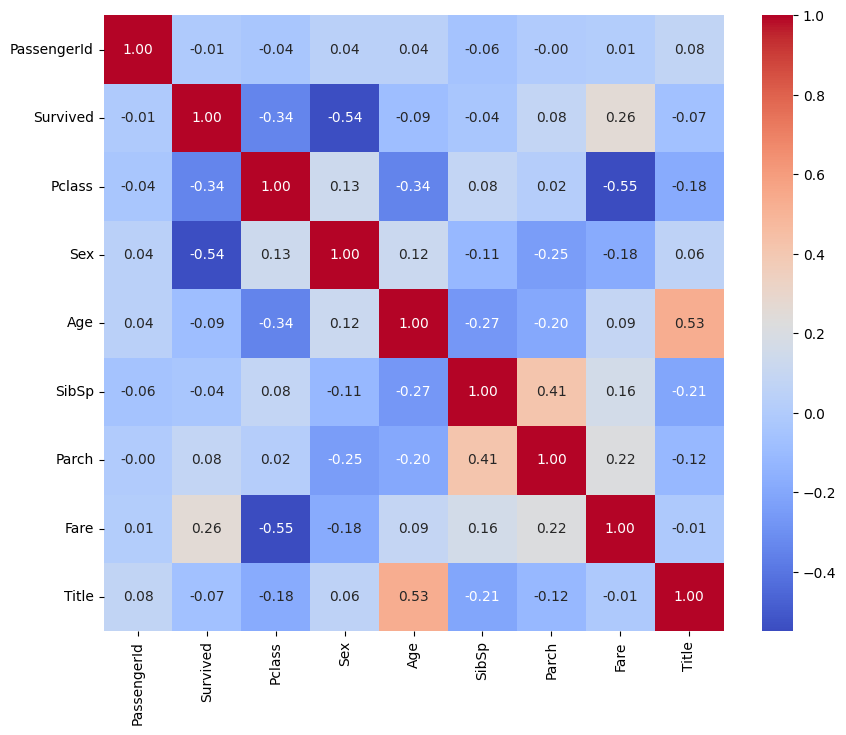

In [106]:
# Correlation heatmap (numeric cols only)
plt.figure(figsize=(10,8))
corr = train_clean.corr(numeric_only=True)
sns.heatmap(corr, annot= True, fmt='.2f',cmap='coolwarm')

In [107]:
# Using One Hote Encoder for categorical (embarked) column
encoder = OneHotEncoder(sparse_output=False)
embarked_encoded = encoder.fit_transform(train_clean[['Embarked']])
encoded_columns = encoder.get_feature_names_out(['Embarked'])
encoded_df = pd.DataFrame(embarked_encoded, columns=encoded_columns)
train_clean = pd.concat([train_clean, encoded_df], axis=1)
train_clean.drop('Embarked', axis=1, inplace=True)

In [108]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    boolean
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Title        891 non-null    int64  
 9   Embarked_C   891 non-null    float64
 10  Embarked_Q   891 non-null    float64
 11  Embarked_S   891 non-null    float64
dtypes: boolean(1), float64(5), int64(6)
memory usage: 78.4 KB


# Model

In [109]:
# I am splitting traind data into two datasets
from sklearn.model_selection import train_test_split
X = train_clean.drop(['Survived', 'PassengerId'], axis=1)
Y = train_clean['Survived']
x_train, x_value, y_train, y_value = train_test_split(X, Y, test_size = 0.22, random_state = 0)

In [110]:
#Decision Tree method
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_value)

# Calculate accuracy using y_pred and y_value
acc_decisiontree = round(accuracy_score(y_value, y_pred) * 100, 2)
print(acc_decisiontree)

79.19


In [111]:
# Random Forest method
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_prediction = randomforest.predict(x_value)
acc_randomforest = round(accuracy_score(y_prediction, y_value) * 100, 2)
print(acc_randomforest)

83.76


In [112]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_prediction = gbk.predict(x_value)
acc_gbk = round(accuracy_score(y_prediction, y_value) * 100, 2)
print(acc_gbk)

85.28


### Gradient Boosting Classifier has the highest score.

# Test data cleanup

In [113]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [114]:
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace = True)

<ipython-input-114-1ed8d6ab0e9c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Embarked'].fillna(test['Embarked'].mode()[0], inplace = True)


In [115]:
test['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme'],
      dtype=object)

In [116]:
test['Title'] = test['Title'].replace(['Don', 'Rev', 'Dr'])
test['Title'] = test['Title'].replace('Mlle', 'Miss')
test['Title'] = test['Title'].replace('Ms', 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')

test['Age'] = test.apply(lambda row: age_mean[row['Title']] if pd.isna(row['Age']) else row['Age'], axis=1)
test['Title'] = test['Title'].map(title_map)
test_clean = test.drop(columns=['Cabin','Ticket', 'Name'], axis=1)
test_clean['Sex'] = test_clean['Sex'].map({'male': True, 'female': False}).astype('boolean')
test_clean['Embarked'] = test_clean['Embarked'].astype('category')

test_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Sex          418 non-null    boolean 
 3   Age          418 non-null    float64 
 4   SibSp        418 non-null    int64   
 5   Parch        418 non-null    int64   
 6   Fare         417 non-null    float64 
 7   Embarked     418 non-null    category
 8   Title        418 non-null    int64   
dtypes: boolean(1), category(1), float64(2), int64(5)
memory usage: 24.3 KB


<ipython-input-116-437b56781e19>:1: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  test['Title'] = test['Title'].replace(['Don', 'Rev', 'Dr'])


In [117]:
encoder = OneHotEncoder(sparse_output=False)
embarked_encoded = encoder.fit_transform(test_clean[['Embarked']])
encoded_columns = encoder.get_feature_names_out(['Embarked'])
encoded_df = pd.DataFrame(embarked_encoded, columns=encoded_columns)
test_clean = pd.concat([test_clean, encoded_df], axis=1)
test_clean.drop('Embarked', axis=1, inplace=True)

In [118]:
test_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    boolean
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Title        418 non-null    int64  
 8   Embarked_C   418 non-null    float64
 9   Embarked_Q   418 non-null    float64
 10  Embarked_S   418 non-null    float64
dtypes: boolean(1), float64(5), int64(5)
memory usage: 33.6 KB


In [119]:
test_clean['Fare'].fillna(test_clean['Fare'].dropna().median(), inplace=True)

<ipython-input-119-6d6b5823ac62>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_clean['Fare'].fillna(test_clean['Fare'].dropna().median(), inplace=True)


In [120]:
# Seting Ids as PassengerId and predict survival
passenger_id = test_clean['PassengerId']
predictions = gbk.predict(test_clean.drop('PassengerId', axis=1))

# Saving output as csv
output = pd.DataFrame({ 'PassengerId' : passenger_id, 'Survived': predictions })
output.to_csv('output.csv', index=False)

In [121]:
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>